# Basic Linear Regression

In [45]:
# Code segment no. 1 (kindly explain, what are each libraries for?)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# Code segment no. 2 (put your comments for this code segment)
import os
path = os.getcwd() + '\\data_linreg\\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [9]:
# Code segment no. 3 (put your comments for this code segment)
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<Axes: xlabel='Population', ylabel='Profit'>

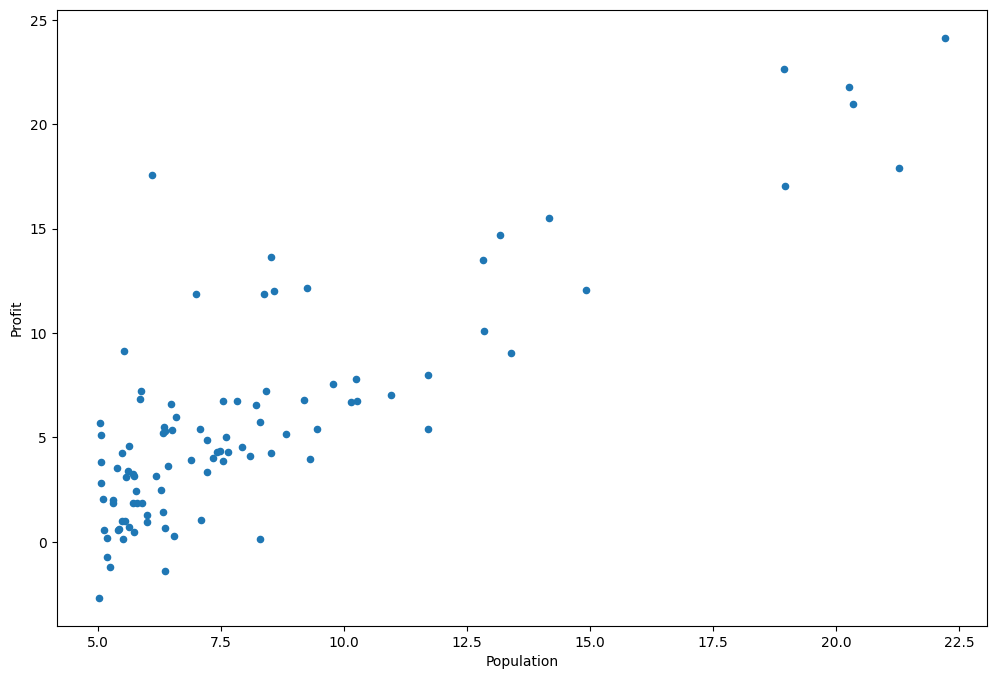

In [10]:
# Code segment no. 4 (put your comments for this code segment)
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [11]:
# Code segment no. 5 (put your comments for this code segment)
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [12]:
# Code segment no. 6 (put your comments for this code segment)
data.insert(0, 'Ones', 1)

In [13]:
# Code segment no. 7 (put your comments for this code segment)
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [14]:
# Code segment no. 8 (put your comments for this code segment)
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [15]:
# Code segment no. 9 (put your comments for this code segment)
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [16]:
# Code segment no. 10 (put your comments for this code segment)
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [17]:
# Code segment no. 11 (put your comments for this code segment)
theta

matrix([[0, 0]])

In [18]:
# Code segment no. 12 (put your comments for this code segment)
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [19]:
# Code segment no. 13 (put your comments for this code segment)
computeCost(X, y, theta)

np.float64(32.072733877455676)

In [20]:
# Code segment no. 14 (put your comments for this code segment)
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [21]:
# Code segment no. 15 (put your comments for this code segment)
alpha = 0.01
iters = 1000

In [22]:
# Code segment no. 16 (put your comments for this code segment)
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [23]:
# Code segment no. 17 (put your comments for this code segment)
computeCost(X, y, g)

np.float64(4.515955503078914)

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

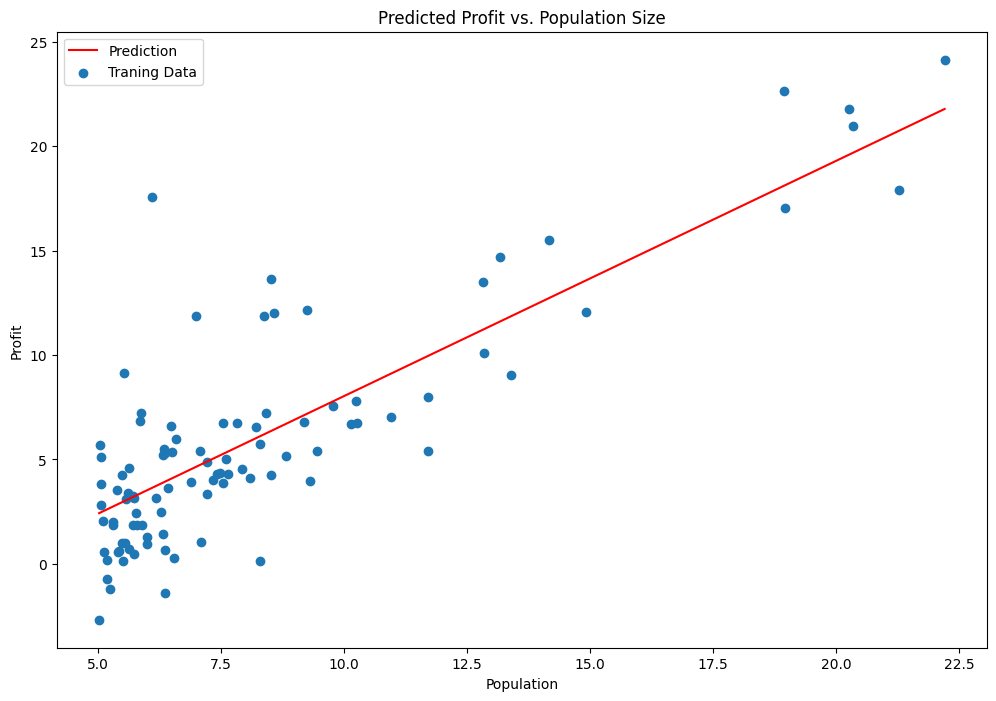

In [24]:
# Code segment no. 18 (put your comments for this code segment)
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

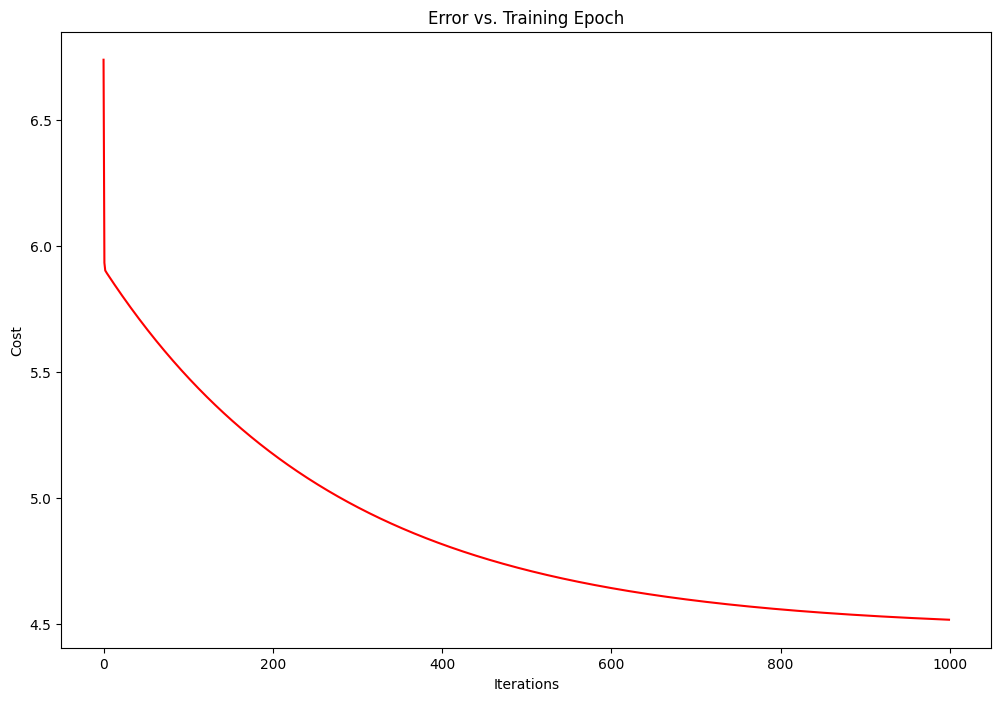

In [25]:
# Code segment no. 19 (put your comments for this code segment)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [51]:
# Performance metrics for the first regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert to numpy arrays for sklearn metrics
X_array = np.asarray(X)
y_array = np.asarray(y)
y_pred = np.asarray(g[0, 0] + g[0, 1] * X_array[:, 1])

# Calculate metrics
mse = mean_squared_error(y_array, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_array, y_pred)
r2 = r2_score(y_array, y_pred)

# Print model coefficients and performance metrics
print("y-intercept: {:.4f}, slope: {:.4f}".format(g[0, 0], g[0, 1]))
print("\nPerformance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

y-intercept: -3.2414, slope: 1.1273

Performance Metrics:
Mean Squared Error (MSE): 9.0319
Root Mean Squared Error (RMSE): 3.0053
Mean Absolute Error (MAE): 2.2366
R² Score: 0.6994


In [50]:
# Calculate prediction for a specific population value
example_population = float(input("Enter population: "))
predicted_profit = float(g[0, 0] + g[0, 1] * example_population)
print(f"\nExample: For a city with population = {example_population}, predicted profit = {predicted_profit:.2f}")


Example: For a city with population = 16.69, predicted profit = 15.57


# Linear regression with multiple variables

In [56]:
# Code segment no. 20 (put your comments for this code segment)
import os
path = os.getcwd() + '\\data_linreg\\ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [57]:
# Code segment no. 21 (put your comments for this code segment)
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [58]:
# Code segment no. 22 (put your comments for this code segment)
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

np.float64(0.13070336960771892)

Text(0.5, 1.0, 'Error vs. Training Epoch')

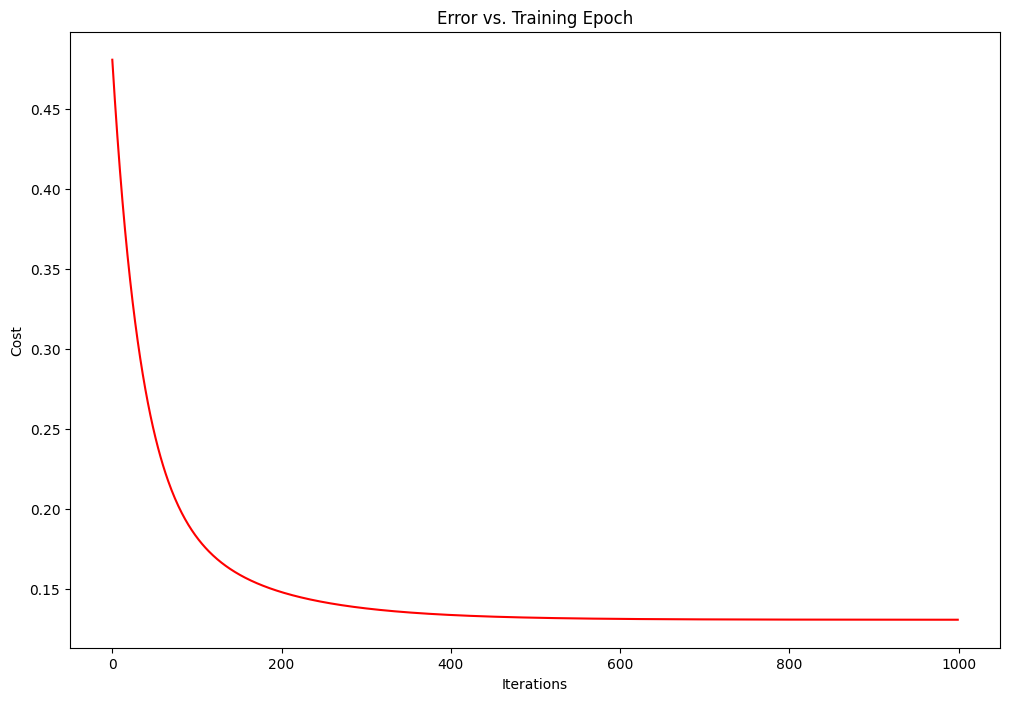

In [59]:
# Code segment no. 23 (put your comments for this code segment)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [60]:
# Code segment no. 24 (corrected - using sklearn with the multiple variable dataset)
from sklearn import linear_model

# Convert matrices to numpy arrays for sklearn compatibility
X2_array = np.asarray(X2)
y2_array = np.asarray(y2)

model = linear_model.LinearRegression()
model.fit(X2_array, y2_array)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
# Code segment no. 25 (put your comments for this code segment)
x = np.asarray(X)[:, 1]
f = model.predict(np.asarray(X)).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

ValueError: X has 2 features, but LinearRegression is expecting 3 features as input.

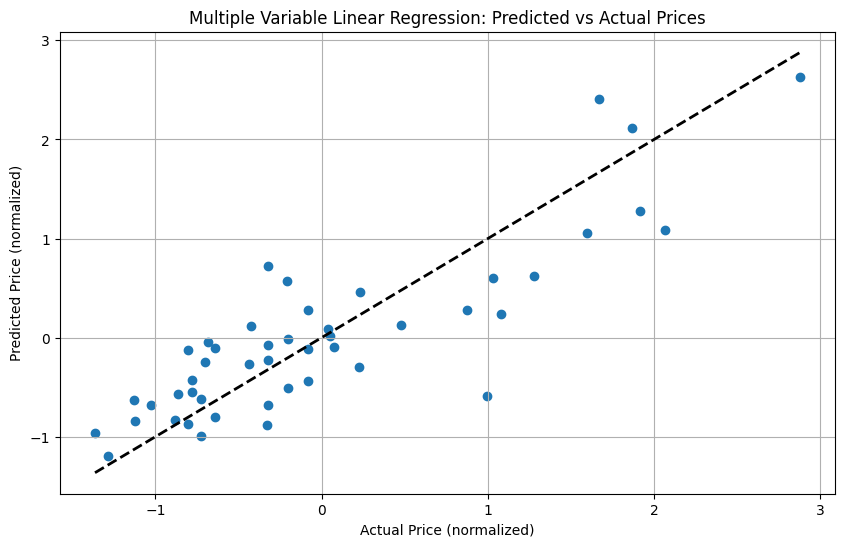

In [64]:
# Code segment no. 25 (corrected - plotting predictions for the multiple variable dataset)
# Since we have multiple features, we can't directly plot in 2D
# Instead, we'll show predicted vs actual values

# Predict using the model
y2_pred = model.predict(X2_array)

# Plot predicted vs actual values
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y2_array, y2_pred)
ax.plot([y2_array.min(), y2_array.max()], [y2_array.min(), y2_array.max()], 'k--', lw=2)
ax.set_xlabel('Actual Price (normalized)')
ax.set_ylabel('Predicted Price (normalized)')
ax.set_title('Multiple Variable Linear Regression: Predicted vs Actual Prices')
plt.grid(True)
plt.show()

In [ ]:
# Comprehensive performance metrics for the multiple variable regression model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

# Print model coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)

# Print model coefficients and intercept
print("Model Formula: Price = {:.4f} + {:.4f} × Size + {:.4f} × Bedrooms".format(
    float(model.intercept_), float(model.coef_[0][1]), float(model.coef_[0][2])))

# Calculate metrics
mse = mean_squared_error(y2_array, y2_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y2_array, y2_pred)
r2 = r2_score(y2_array, y2_pred)

print("\nPerformance Metrics (on normalized data):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Final Cost (from gradient descent): {cost2[-1]:.4f}")

Model coefficients: [[ 0.          0.88476599 -0.05317882]]
Model intercept: [-9.94684368e-17]
Model Formula: Price = -0.0000 + 0.8848 × Size + -0.0532 × Bedrooms

Performance Metrics (on normalized data):
Mean Squared Error (MSE): 0.2614
Root Mean Squared Error (RMSE): 0.5112
Mean Absolute Error (MAE): 0.4119
R² Score: 0.7329
Explained Variance Score: 0.7329
Final Cost (from gradient descent): 0.1307


C:\Users\timothyjtc\AppData\Local\Temp\ipykernel_15348\1028080230.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  float(model.intercept_), float(model.coef_[0][1]), float(model.coef_[0][2])))


In [ ]:
# Optional: Make a prediction for a specific house
example_size = 0.1  # Normalized value
example_bedrooms = 0.5  # Normalized value
example_input = np.array([[1, example_size, example_bedrooms]])  # Include the bias term
predicted_price = model.predict(example_input)[0][0]
print(f"\nExample: For a house with normalized size = {example_size} and bedrooms = {example_bedrooms}, predicted price = {predicted_price:.4f}")

# Create a residual plot to analyze prediction errors
residuals = y2_array - y2_pred
plt.figure(figsize=(10, 6))
plt.scatter(y2_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price (normalized)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()